<a href="https://colab.research.google.com/github/surajghuwalewala/CE888_Data_Science_and_Decision_Making/blob/master/Lab_7/Exercise-Food-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN implementation on Food-11 Dataset

Dataset [link](https://www.kaggle.com/trolukovich/food11-image-dataset)

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "surajghuwalewala" # username from the json file
os.environ['KAGGLE_KEY'] = "c14ff4f2803c1ffb349c4b9e1a57020b" # key from the json file
DOWNLOAD_DATA = True

if DOWNLOAD_DATA:
    !kaggle datasets download -d trolukovich/food11-image-dataset # api copied from kaggle
    !unzip -qq /content/food11-image-dataset.zip  ## -qq for no verbose

 99% 1.07G/1.08G [00:16<00:00, 46.1MB/s]
100% 1.08G/1.08G [00:16<00:00, 70.1MB/s]


In [0]:
train_dir = '/content/training/'
test_dir = '/content/evaluation/'
val_dir = '/content/validation/'



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

IMG_SIZE = 56

train_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE), 
                                                    batch_size=100,
                                                    class_mode='categorical')

validation_generator = datagen.flow_from_directory(val_dir,
                                                        target_size=(IMG_SIZE, IMG_SIZE),
                                                        batch_size=100,
                                                        class_mode='categorical')

test_generator = datagen.flow_from_directory(test_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=100,
                                                    class_mode='categorical')


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [0]:
from keras import layers
from keras import models
from keras.layers import BatchNormalization, Activation



model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 54, 54, 32)        896       
_________________________________________________________________
activation_34 (Activation)   (None, 54, 54, 32)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
activation_35 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 64)      

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=30,
                              epochs=5,
                              validation_data=validation_generator,
                              validation_steps=25)

Epoch 1/5
30/30 [==============================] - 27s 885ms/step - loss: 0.6559 - acc: 0.7827 - val_loss: 1.5898 - val_acc: 0.5112
Epoch 2/5
30/30 [==============================] - 22s 725ms/step - loss: 0.6559 - acc: 0.7763 - val_loss: 1.7158 - val_acc: 0.5004
Epoch 3/5
30/30 [==============================] - 22s 739ms/step - loss: 0.6869 - acc: 0.7628 - val_loss: 1.5162 - val_acc: 0.5337
Epoch 4/5
30/30 [==============================] - 23s 750ms/step - loss: 0.5879 - acc: 0.7968 - val_loss: 1.7237 - val_acc: 0.5228
Epoch 5/5
30/30 [==============================] - 22s 737ms/step - loss: 0.5691 - acc: 0.7940 - val_loss: 1.6607 - val_acc: 0.5309


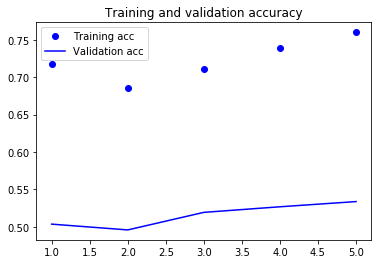

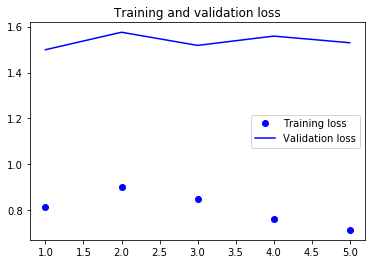

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()